**KNN**

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/archive (42).zip')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.isna().any()

,0
fixed acidity,False
volatile acidity,False
citric acid,False
residual sugar,False
chlorides,False
free sulfur dioxide,False
total sulfur dioxide,False
density,False
pH,False
sulphates,False


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
x=data.iloc[:,:11]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y=data.iloc[:,11]
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sd=StandardScaler()

In [ ]:
x_train1=sd.fit_transform(x_train)
x_train1

array([[ 0.90103398,  0.05480282,  0.9094138 , ...,  0.52091013,
        -0.22358408, -0.95579434],
       [ 1.41998736, -1.47967601,  0.9094138 , ..., -1.16841553,
        -0.68130963, -0.76727388],
       [ 0.90103398, -0.98645067,  1.4208416 , ..., -0.3237527 ,
         0.74908272,  0.17532846],
       ...,
       [-0.25219574,  0.21921126,  0.19341488, ..., -0.12883051,
         0.17692578, -0.86153411],
       [ 2.68854005, -0.32881689,  1.11398492, ..., -0.06385645,
         0.11971008,  2.15479335],
       [ 0.84337249,  2.46612668,  0.24455766, ..., -0.38872677,
        -1.0246038 , -0.95579434]])

In [ ]:
x_test1=sd.fit_transform(x_test)
x_test1

array([[ 1.44653617, -0.29922497,  0.8557103 , ..., -0.93785052,
         0.72205872,  0.31519731],
       [-0.08433993,  1.83333604, -1.39006001, ...,  0.28055357,
        -0.85116573, -0.79369656],
       [ 0.48265122, -1.39597062,  0.33343814, ..., -0.36071174,
         1.26926723,  1.14686771],
       ...,
       [ 0.48265122, -1.09131905,  0.80348308, ..., -0.87372399,
        -0.7143636 ,  0.86964424],
       [ 0.48265122,  1.49821931, -1.18115114, ..., -0.16833214,
        -0.78276467, -0.70128874],
       [-0.02764082, -1.21317968,  0.80348308, ..., -0.29658521,
        -0.7143636 ,  1.70131464]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k=5

In [ ]:
model=KNeighborsClassifier(n_neighbors=k)

In [ ]:
model.fit(x_train1,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(x_test1)
y_pred

array([6, 5, 7, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 7, 7, 5, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 7, 5, 7, 7, 7,
       6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5, 5, 6, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 6, 6, 5, 5, 7, 5, 5, 6, 7, 6, 5, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 7, 5, 5, 6, 7, 7, 5, 6, 5, 5, 5, 5, 6, 7, 5, 5, 6, 7, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 6, 6, 5, 5, 5, 5, 6,
       5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 7, 6, 6,
       5, 7, 5, 5, 5, 7, 6, 6, 6, 6, 6, 5, 5, 7, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 7, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 7, 6, 5, 7, 6, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 7, 6, 6, 5, 6, 6, 6,
       5, 5, 7, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.60625

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  5,  6,  0,  0],
       [ 0,  0, 98, 34,  3,  0],
       [ 0,  0, 49, 82, 11,  0],
       [ 0,  0,  6,  7, 14,  0],
       [ 0,  0,  0,  1,  2,  0]])

In [ ]:
acc=(98+82+14)/(2+5+6+98+34+3+49+82+11+6+7+14+1+2)
acc

0.60625

**Naive Bayes**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/archive (42).zip')

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
sd.fit(x_train)
x_train=sd.transform(x_train)

In [ ]:
sd=StandardScaler()
sd.fit(x_test)
x_test1=sd.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
ypred1=nb.predict(x_test1)
ypred1

array([7, 6, 5, 5, 5, 6, 4, 5, 5, 5, 6, 7, 5, 6, 5, 7, 6, 7, 6, 6, 6, 6,
       5, 8, 5, 7, 5, 7, 7, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 7, 6, 6, 6, 5, 5, 5, 4, 6, 5, 4, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6,
       7, 7, 7, 7, 5, 5, 6, 5, 5, 6, 6, 5, 7, 5, 5, 6, 6, 6, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 6, 8, 5, 6, 5, 5, 6, 5, 6, 5, 6, 8, 6, 5, 6, 6,
       7, 5, 6, 3, 6, 6, 5, 6, 6, 7, 4, 6, 6, 5, 7, 6, 7, 7, 6, 5, 6, 5,
       7, 5, 7, 5, 6, 5, 5, 7, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 6, 8, 5,
       6, 5, 7, 5, 6, 6, 5, 5, 5, 5, 6, 7, 7, 6, 5, 5, 7, 6, 7, 6, 6, 7,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 7, 6, 5, 6, 6, 5, 5, 5, 5, 5,
       5, 7, 5, 6, 5, 5, 5, 6, 7, 7, 6, 5, 7, 5, 5, 5, 7, 6, 6, 6, 5, 6,
       5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 7, 5,
       5, 7, 6, 7, 5, 6, 5, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 6, 5, 5, 5,
       6, 7, 5, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 5, 6, 5, 6, 5, 4, 6, 6, 5,
       4, 6, 7, 7, 7, 6, 4, 5, 5, 4, 8, 4, 5, 5, 7,

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,ypred1)

0.58125

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
label=['yes','no']

In [ ]:
cm1=confusion_matrix(y_test,ypred1)
cm1

array([[ 0,  1,  0,  0,  0,  0],
       [ 1,  1,  4,  2,  0,  1],
       [ 1,  3, 87, 25,  6,  0],
       [ 0,  5, 46, 77, 16,  3],
       [ 0,  0,  3, 11, 21,  1],
       [ 0,  0,  0,  0,  5,  0]])

In [ ]:
cm1=(1+87+77+21) / (1+1+1+4+2+1+1+3+87+25+6+5+46+77+16+3+3+11+21+1+5)
cm1

0.58125

AttributeError: 'float' object has no attribute 'shape'

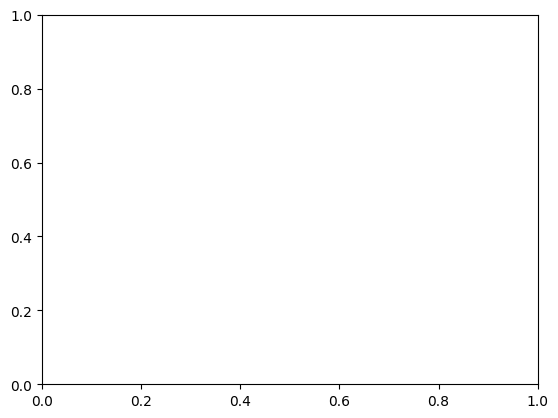

In [ ]:
cmd1=ConfusionMatrixDisplay(cm1,display_labels=label)
cmd1.plot()


In [ ]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(x_train,y_train)

BernoulliNB()

In [ ]:
ypred=model.predict(x_test1)
ypred

array([7, 7, 5, 5, 6, 6, 6, 5, 5, 5, 6, 7, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5,
       5, 6, 5, 7, 5, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6,
       5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6,
       7, 7, 7, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 7, 5, 5, 7, 6, 5, 5,
       6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6,
       7, 6, 5, 5, 6, 7, 5, 7, 6, 7, 5, 5, 6, 5, 7, 5, 7, 7, 6, 6, 7, 5,
       7, 6, 7, 5, 6, 6, 5, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 5, 6, 7, 7, 6, 5, 5, 6, 6, 7, 6, 6, 7,
       5, 7, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5,
       5, 7, 5, 6, 5, 5, 5, 5, 7, 7, 6, 5, 7, 5, 5, 5, 7, 6, 7, 6, 5, 6,
       5, 6, 5, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 7, 5,
       5, 7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 5, 5,
       7, 6, 6, 5, 5, 6, 5, 7, 5, 7, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 7, 5,
       5, 7, 7, 7, 7, 7, 5, 5, 5, 5, 6, 6, 5, 6, 7,

In [ ]:
metrics.accuracy_score(y_test,ypred)

0.503125

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
label=['yes','no']

In [ ]:
cm=confusion_matrix(y_test,ypred)
cm

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  5,  4,  0,  0],
       [ 0,  0, 85, 33,  4,  0],
       [ 0,  0, 67, 56, 24,  0],
       [ 0,  0,  4, 12, 20,  0],
       [ 0,  0,  0,  0,  5,  0]])

In [ ]:
cm=(85+56+20) / (1+5+4+85+33+4+67+56+24+4+12+20+5)
cm

0.503125

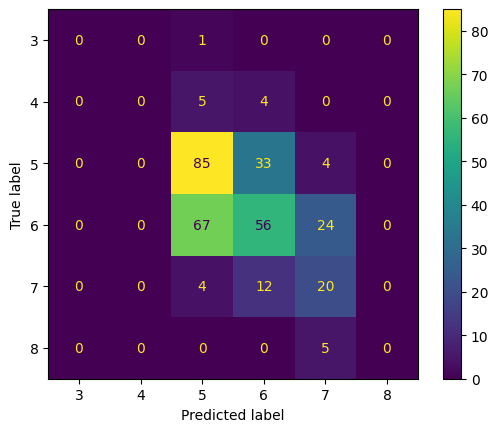

In [ ]:
label = [str(i) for i in sorted(data['quality'].unique())]
cmd=ConfusionMatrixDisplay(cm,display_labels=label)
cmd.plot()

**Decision tree**

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/archive (42).zip')

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.quality.value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
y=data.quality
y.head(3)

,quality
0,5
1,5
2,5


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split (x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn import tree

In [ ]:
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(x_test)
y_pred

array([6, 4, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5,
       6, 6, 5, 6, 5, 7, 5, 5, 7, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 5, 7,
       5, 5, 5, 6, 6, 6, 5, 4, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 6, 6, 4, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 6, 5, 4, 5,
       5, 5, 5, 6, 6, 5, 7, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6, 5, 6, 6, 5,
       6, 5, 8, 6, 6, 6, 5, 7, 4, 6, 5, 6, 4, 5, 7, 6, 5, 5, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 5, 7, 5, 6, 5, 5, 6, 5, 6, 8, 6, 5, 5, 5, 5, 6, 5,
       6, 6, 5, 5, 6, 7, 6, 5, 7, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 7, 4, 7,
       5, 7, 7, 5, 6, 8, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       6, 5, 5, 7, 6, 6, 5, 6, 5, 7, 7, 6, 5, 6, 5, 5, 7, 6, 5, 7, 6, 5,
       5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 7, 7, 6, 5, 6,
       6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5, 4, 6, 5, 5, 5, 7, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 5, 3, 5, 6, 5, 6, 7, 6, 6, 7, 5, 7, 3, 5, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6,

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(15,15))



<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

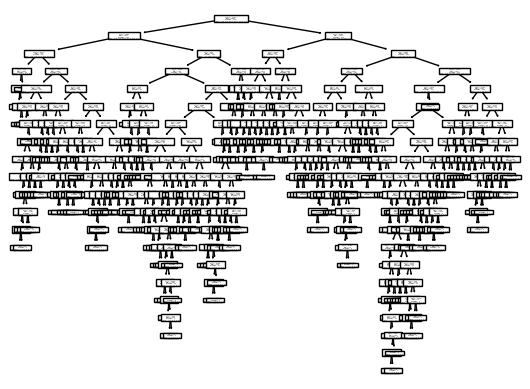

In [ ]:
tree.plot_tree(dt)
plt.show()

In [ ]:
y_train.value_counts()

,count
quality,
5,546
6,496
7,172
4,42
8,15
3,8


In [ ]:
plt.figure(figsize=(15,15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

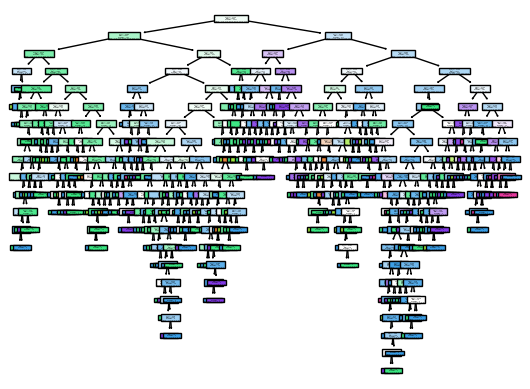

In [ ]:
tree.plot_tree(dt,filled=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.66875

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 0,  0,  1,  1,  0,  0],
       [ 0,  3,  3,  5,  0,  0],
       [ 2,  6, 98, 25,  4,  0],
       [ 0,  3, 30, 95, 14,  0],
       [ 0,  0,  2,  4, 18,  3],
       [ 0,  0,  0,  1,  2,  0]])

In [ ]:
cm=(3+98+95+18) / (1+1+3+3+5+2+6+98+25+4+3+30+95+14+2+4+18+3+1+2)
cm

0.66875